# Aadhaar Lifecycle Optimization: Mandatory Biometric Updates

## Objective
To optimize the Aadhaar lifecycle by analyzing enrolment trends to predict mandatory biometric update needs for children aged 5 and 15.

## Problem Statement
Aadhaar holders are required to update their biometrics (mandatory biometric update) upon attaining the age of **5 years** and **15 years**.
This analysis leverages "Aadhaar Monthly Enrolment Data" and "Aadhaar Demographic Monthly Update Data" to:
1.  Identify districts with high volumes of 0-5 year enrolments (indicating future demand for 5-year updates).
2.  Assess current update activity for the 5-17 age band.
3.  Provide actionable insights for resource allocation (e.g., setting up update centers).

## Data Sources
- **Enrolment Data:** Counts of new enrolments by age band (0-5, 5-17, 18+).
- **Update Data:** Counts of demographic updates by age band.
Data is fetched from Open Government Data (OGD) Platform India APIs.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Ensure src is in path
if 'src' not in sys.path:
    sys.path.append(os.path.join(os.getcwd(), 'src'))

from src.data_processor import AadhaarDataProcessor


In [4]:
# Set API Key (Use environment variable or replace string below)
# export DATA_GOV_IN_API_KEY='your_key_here'
api_key = "579b464db66ec23bdd00000144bab08a34614d71405562fe03c815b5"

if not api_key:
    # Fallback prompt or error
    print("Please set DATA_GOV_IN_API_KEY environment variable.")
else:
    print("API Key found.")


API Key found.


In [5]:
# Initialize Processor
processor = AadhaarDataProcessor(api_key=api_key)

# Fetch Data (Limit set to 5000 for demonstration)
print("Fetching Enrolment Data...")
enrol_df = processor.get_enrolment_data(limit=5000)

print("Fetching Update Data...")
update_df = processor.get_update_data(limit=5000)


Fetching Enrolment Data...
Fetching enrolment data (limit=5000)...
Fetching Update Data...
Fetching update data (limit=5000)...


In [6]:
if enrol_df.empty and update_df.empty:
    print("No data fetched from API. Please check your API key or internet connection.")
else:
    # Clean Data
    enrol_clean = processor.clean_enrolment_data(enrol_df)
    update_clean = processor.clean_update_data(update_df)

    try:
        # Merge Datasets
        merged_df = processor.merge_datasets(enrol_clean, update_clean)
        
        # Preprocess / Aggregate
        summary_df = processor.preprocess_for_lifecycle_optimization(merged_df)

        print(f"Total Merged Records: {len(merged_df)}")
        print(merged_df.head())
        
    except ValueError as e:
        print(f"Error during merge: {e}")
        merged_df = pd.DataFrame()


Total Merged Records: 10000
        date                        state                  district pincode  \
0 2025-03-01  Andaman And Nicobar Islands  North And Middle Andaman  744202   
1 2025-03-01               Andhra Pradesh                  Adilabad  504105   
2 2025-03-01               Andhra Pradesh                  Adilabad  504205   
3 2025-03-01               Andhra Pradesh                  Adilabad  504206   
4 2025-03-01               Andhra Pradesh                  Adilabad  504216   

   age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_18_plus  \
0        0         0               0             10               201   
1        0         0               0             17                61   
2        0         0               0             12               107   
3        0         0               0             17                83   
4        0         0               0             21                95   

  month_year  
0    2025-03  
1    2025-03  
2    2025-03 

## Visualization 1: Future Demand for Age 5 Updates
High enrolments in the **0-5 age group** today translate to a surge in mandatory biometric updates in roughly 5 years.


C:\Users\SOUMIK SEAL\AppData\Local\Temp\ipykernel_13488\3121051655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_demand.values, y=state_demand.index, palette='viridis')


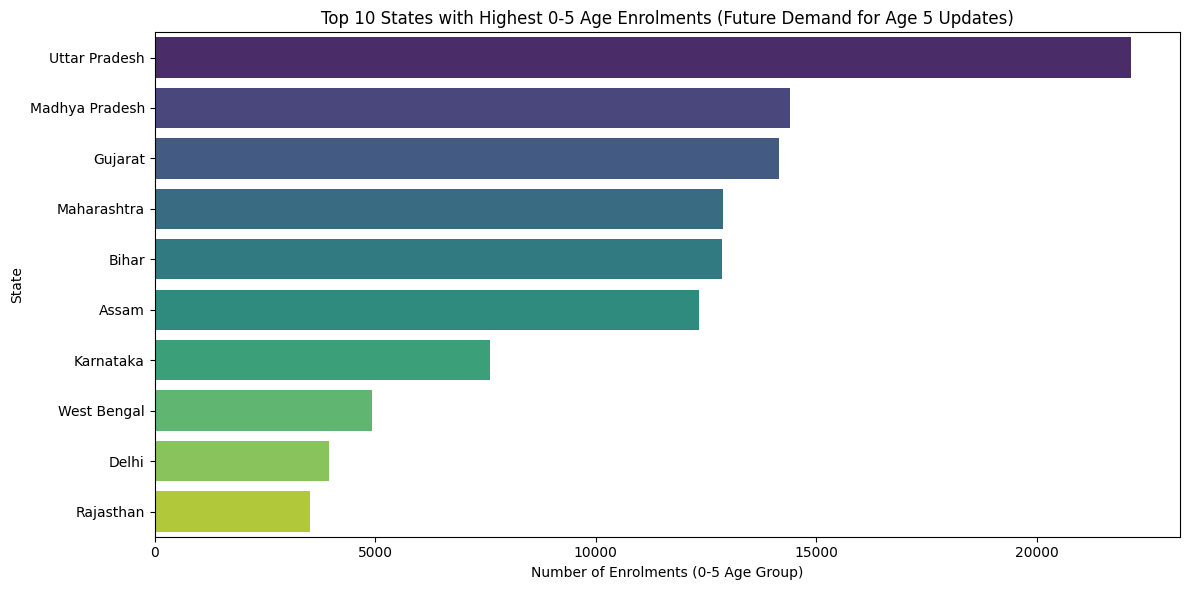

In [7]:
if not merged_df.empty and 'age_0_5' in merged_df.columns:
    # Aggregate 0-5 enrolments by State
    state_demand = merged_df.groupby('state')['age_0_5'].sum().sort_values(ascending=False).head(10)
    
    if not state_demand.empty:
        plt.figure(figsize=(12, 6))
        sns.barplot(x=state_demand.values, y=state_demand.index, palette='viridis')
        plt.title('Top 10 States with Highest 0-5 Age Enrolments (Future Demand for Age 5 Updates)')
        plt.xlabel('Number of Enrolments (0-5 Age Group)')
        plt.ylabel('State')
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for visualization.")
else:
    print("Skipping visualization: No merged data or missing columns.")


## Visualization 2: Current Update Activity (Age 5-17)
This shows where demographic updates for the **5-17 age group** (which includes the mandatory 15-year update) are currently happening.


C:\Users\SOUMIK SEAL\AppData\Local\Temp\ipykernel_13488\606437877.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_updates.values, y=state_updates.index, palette='magma')


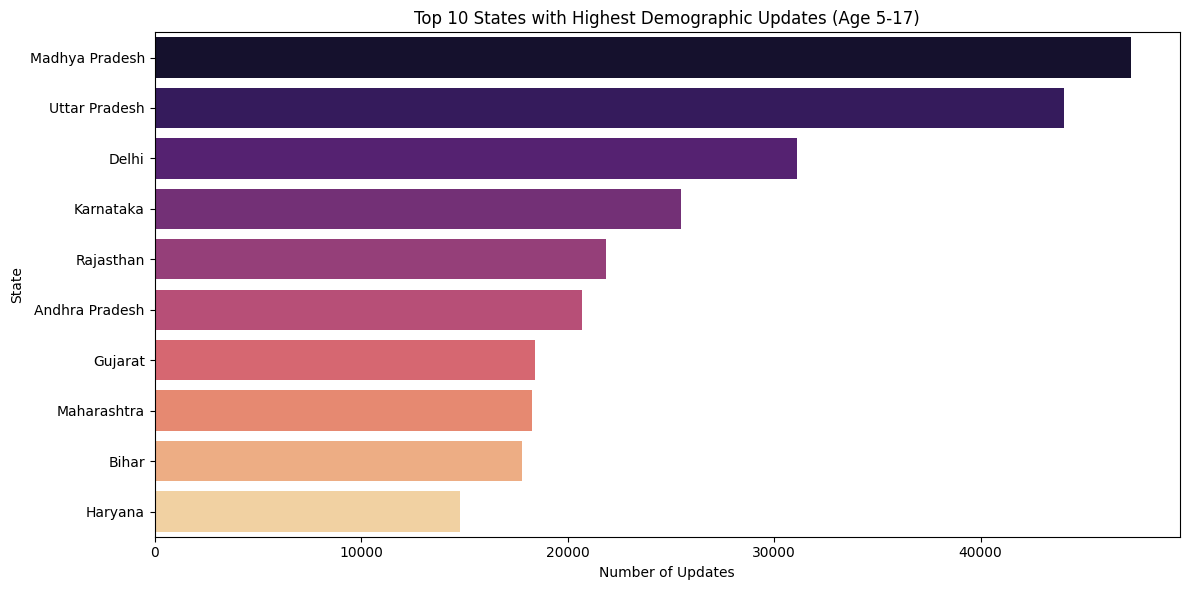

In [8]:
if not merged_df.empty and 'demo_age_5_17' in merged_df.columns:
    # Aggregate 5-17 updates by State
    state_updates = merged_df.groupby('state')['demo_age_5_17'].sum().sort_values(ascending=False).head(10)
    
    if not state_updates.empty:
        plt.figure(figsize=(12, 6))
        sns.barplot(x=state_updates.values, y=state_updates.index, palette='magma')
        plt.title('Top 10 States with Highest Demographic Updates (Age 5-17)')
        plt.xlabel('Number of Updates')
        plt.ylabel('State')
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for visualization.")
else:
    print("Skipping visualization: No merged data or missing columns.")


## Conclusion
- **States with high 0-5 enrolments** need to plan for increased capacity at Enrolment/Update centers in the coming years.
- **States with high current updates** indicate active compliance or high modification needs in the 5-17 demographic.
This data-driven approach allows UIDAI to allocate resources efficiently.
